<a href="https://colab.research.google.com/github/FullBinaryAlchemist/TensorflowPractice/blob/master/Cipher10_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


# Loading the dataset


In [0]:
import tensorflow.keras.datasets.cifar10 as cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


#Exploring the dataset

Number of samples

In [0]:
print(len(x_train))
print(len(x_test))

50000
10000


Shape and number of channels

In [0]:
print(x_train[0].shape)
import numpy as np
print("Number of output classes:",len(np.unique(y_train)))

(32, 32, 3)
Number of output classes: 10


In [0]:
print(x_train[0])
print(y_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


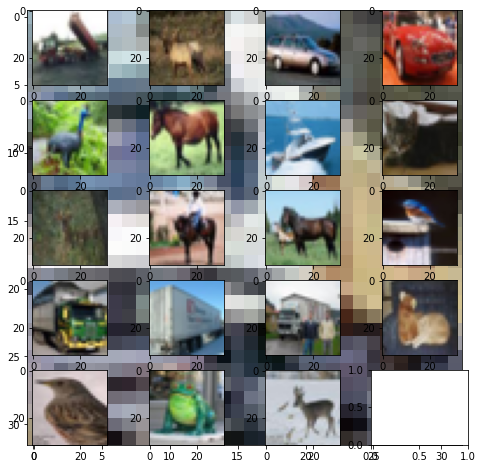

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 8))
rows=5
columns=4
for i in range(1,rows*columns+1):
  plt.imshow(x_train[i])
  fig.add_subplot(rows,columns,i)
plt.show()


#Preprocessing the images

In [0]:
x_train_norm=x_train/255.0
x_test_norm=x_test/255.0 # Normalising to range 0 to 1.0



In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
BATCH_SIZE=64
train_data_gen=ImageDataGenerator(
          horizontal_flip=True,
          rotation_range=10,
          shear_range=0.1,
                                  )
train_data_augmented=train_data_gen.flow(x_train_norm,y_train,batch_size=BATCH_SIZE)

validation_data_gen=ImageDataGenerator()


#Building Models


In [0]:
model1= tf.keras.models.Sequential(
    [
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    ])
model1.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               147584    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [0]:
model1.fit(#train_data_augmented,
           x_train_norm,y_train,
           steps_per_epoch=len(x_train_norm)//BATCH_SIZE,
           validation_data=validation_data_gen.flow(x_test_norm,y_test,batch_size=32),
           validation_steps=len(x_test_norm)//32,
           epochs=15)

Epoch 1/15
781/781 [==============================] - 7s 9ms/step - loss: 0.8771 - accuracy: 0.1001 - val_loss: 0.9183 - val_accuracy: 0.1071
Epoch 2/15
781/781 [==============================] - 7s 9ms/step - loss: 0.8027 - accuracy: 0.0995 - val_loss: 0.8923 - val_accuracy: 0.0905
Epoch 3/15
781/781 [==============================] - 7s 9ms/step - loss: 0.7419 - accuracy: 0.1007 - val_loss: 0.9061 - val_accuracy: 0.1026
Epoch 4/15
781/781 [==============================] - 7s 9ms/step - loss: 0.6871 - accuracy: 0.1002 - val_loss: 0.9385 - val_accuracy: 0.1359
Epoch 5/15
781/781 [==============================] - 7s 8ms/step - loss: 0.6306 - accuracy: 0.0994 - val_loss: 0.9167 - val_accuracy: 0.1159
Epoch 6/15
781/781 [==============================] - 7s 8ms/step - loss: 0.5880 - accuracy: 0.1003 - val_loss: 0.9106 - val_accuracy: 0.1022
Epoch 7/15
781/781 [==============================] - 7s 8ms/step - loss: 0.5432 - accuracy: 0.0996 - val_loss: 0.9221 - val_accuracy: 0.0962
Epoch 

Using Transfer Learning Models

In [0]:
#ResNet
from tensorflow.keras.applications import ResNet50V2
base_model= ResNet50V2(include_top=False, weights='imagenet',input_shape=(32,32,3),pooling='avg')

for layer in base_model.layers:
  layer.trainable=False

In [0]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [0]:
resnet_model= tf.keras.models.Sequential([
                                          base_model, 
                                          tf.keras.layers.Dense(256,activation='relu'),
                                          tf.keras.layers.Dense(10,activation='softmax'),
])

resnet_model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [0]:
resnet_model.fit(x_train_norm,y_train,
                 steps_per_epoch=len(x_train_norm)//BATCH_SIZE,
                 validation_data=(x_test_norm,y_test),
                 epochs=15)

Epoch 1/15
781/781 [==============================] - 30s 38ms/step - loss: 1.4445 - accuracy: 0.5046 - val_loss: 1.8432 - val_accuracy: 0.4036
Epoch 2/15
781/781 [==============================] - 29s 37ms/step - loss: 1.3874 - accuracy: 0.5261 - val_loss: 1.9028 - val_accuracy: 0.3965
Epoch 3/15
781/781 [==============================] - 29s 37ms/step - loss: 1.3426 - accuracy: 0.5418 - val_loss: 1.9303 - val_accuracy: 0.3991
Epoch 4/15
781/781 [==============================] - 29s 37ms/step - loss: 1.3031 - accuracy: 0.5565 - val_loss: 1.9639 - val_accuracy: 0.3942
Epoch 5/15
781/781 [==============================] - 29s 37ms/step - loss: 1.2653 - accuracy: 0.5664 - val_loss: 2.0108 - val_accuracy: 0.3965
Epoch 6/15
781/781 [==============================] - 29s 37ms/step - loss: 1.2254 - accuracy: 0.5830 - val_loss: 2.0535 - val_accuracy: 0.3945
Epoch 7/15
781/781 [==============================] - 29s 37ms/step - loss: 1.1876 - accuracy: 0.5964 - val_loss: 2.1299 - val_accuracy: